**Reference**
- Introduction to Machine Learning with Python, Andreas Muller et al. 
 - Github link : https://github.com/amueller/introduction_to_ml_with_python
 - git clone and study with them if you want
---

Install some external library
- **mglearn**
 - not a commonly used library. You don't have to study this library. just follow the code in the example and just see.
 - contains some utility functions for loading dataset and drawing graph for explaination, ... etc

 > pip install mglearn

- **Others**

 > conda install graphviz python-graphviz
 - used for visualizing decision tree.
 - These are not contained in 'Anaconda' so you have to install manually

In [3]:
# import some basic library used for the class
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

## Decision trees

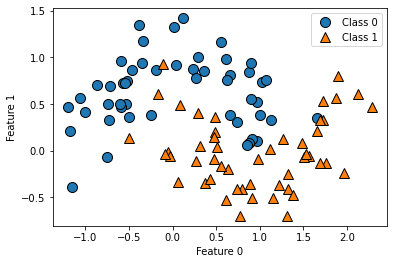

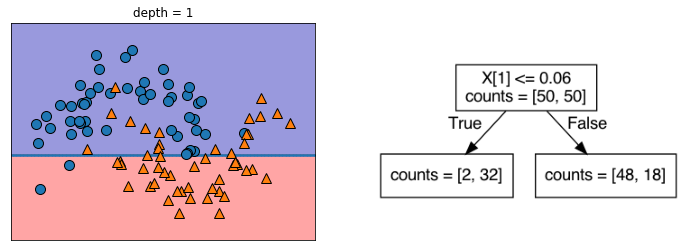

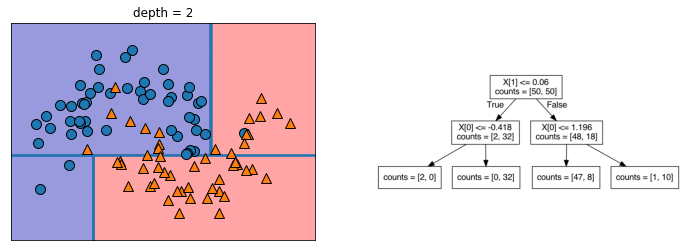

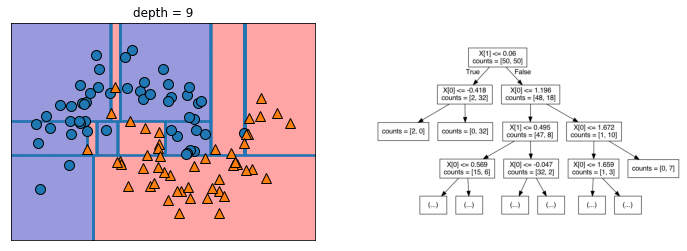

In [4]:
# remind how the DT works
mglearn.plots.plot_tree_progressive()

##### Load the dataset

In [26]:
from sklearn.datasets import load_breast_cancer

#  we can load the dataset with this code:  breast_cancer dataset
cancer = load_breast_cancer() # several famous datasets are offered by sklearn

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
- target variable (class) : malignant(악성) or benign(양성) - Categorical result
- classification problem

#### after you load the dataset, Look at Your Data (EDA)
- You can use spotfire.
- Still, you should know basic usage of matplotlib. It's very useful to make a neat graph. 
- Skip this step because this is just a simple example. No need to do EDA or preprocessing for this famous dataset. When dealing with real-world dataset, you need to do a lot of **EDA & preprocessing**. Keep in mind. 
- The preprocessing and EDA steps seem to be the most valuable steps. For the most projects, preprocessing is the harshest step. You may feel it while working on a team-project. 

In [6]:
# dictionary
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
cancer.data.shape # check the number of instances and variables

(569, 30)

In [8]:
# 0:benign(양성), 1: malignant(악성)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
# class distribution
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

#### train/test split
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Googling
- main arguments:
    - test_size, random_states, shuffle, stratify

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#### DecisionTreeClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
- main arguments:
    - criterion, max_depth, min_samples_leaf, ...
    - Please also check other arguments.
- The learning algorithms in scikit-learn have almost same interfaces.
    - *.fit* for training the model, *.predict* for prediction

In [11]:
# model training with labeled training data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0) # create an object . change some arguments for practice
clf.fit(X_train, y_train) # training proceeds

DecisionTreeClassifier(random_state=0)

**Performance evaluation**
- Classification
    - Accuracy
    - Error rate
    - Confusion matrix

- Regression
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - Coefficient of Determination ($R^2$)


In [12]:
# prediction
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

In [13]:
# evaluation (Classification 문제임)
from sklearn.metrics import accuracy_score
# true y and predicted y
print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on training set:  1.0
Accuracy on testing set:  0.9370629370629371


- DT was **fully grown** and **hit all the training instances.**
- But there exists errors for the test set. <U>overfitting</U> or underfitting?

#### Changing the hyperparameter

In [14]:
# same as before
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

- Let's change the hyperparameters and check the performance
    - hyperparameter to be changed : min_samples_leaf
    - Think about
        - setting to a lower value will results in *[overfitting or underfitting ?]*

In [15]:
# try this yourself
training_accuracy = []
test_accuracy = [] # store the results in lists.

msl_settings = [1, 2, 5, 7, 10, 20] # code will iterate over these six settings with the for statement
for msl in msl_settings:
#        '''TODO'''
#     creating object
    clf = DecisionTreeClassifier(min_samples_leaf= msl, random_state=0)
#     training
    clf.fit(X_train, y_train)
#     prediction
    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)
#     evaluation
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [16]:
# check the result (using pd.DataFrame to make a neat table)
result = pd.DataFrame({"min_samples_leaf":msl_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

In [17]:
result # among these results, what do you think is the best result?

,min_samples_leaf,training accuracy,test accuracy
0,1,1.000000,0.937063
1,2,0.990610,0.937063
2,5,0.976526,0.937063
3,7,0.962441,0.951049
4,10,0.962441,0.951049
5,20,0.946009,0.916084


3번과 4번이 가장 좋은 결과

Because ultimate goal is getting the highest test accuracy.

Above 3,4 is overfitting and below 3,4 is underfitting.

#### Visualizing Decision Trees

In [18]:
clf = DecisionTreeClassifier(min_samples_leaf= 10, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

[Text(0.5769230769230769, 0.9166666666666666, 'X[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.38461538461538464, 0.75, 'X[27] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[10] <= 0.524\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[21] <= 29.985\ngini = 0.016\nsamples = 242\nvalue = [2, 240]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 211\nvalue = [0, 211]'),
 Text(0.23076923076923078, 0.25, 'X[26] <= 0.204\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.5384615384615384, 0.5833333333333334, 'X[21] <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [2

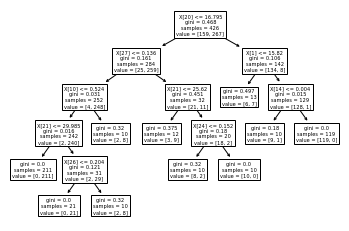

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

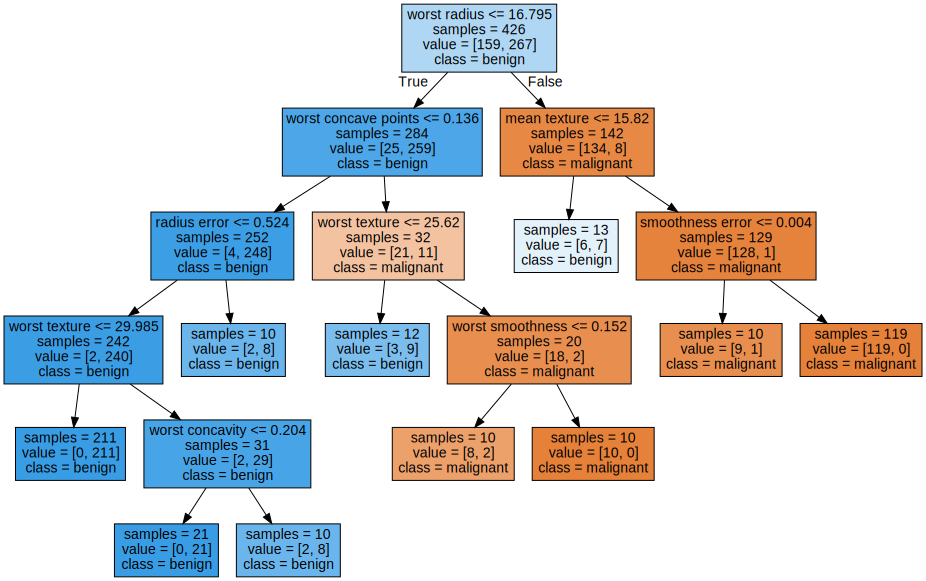

In [20]:
# if you want to get more clear tree
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees
- feature importance summarizes the workings of a tree by rating how important each feature is for the decision the tree makes.
    - The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
        - ex) If a feature cannot make any split, its importance goes to zero.
    - It has a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.”

In [21]:
print("Feature importances:")
print(clf.feature_importances_)

Feature importances:
[0.         0.03759604 0.         0.         0.         0.
 0.         0.         0.         0.         0.00399028 0.
 0.         0.         0.00104266 0.         0.         0.
 0.         0.         0.78335118 0.03708714 0.         0.
 0.00226055 0.         0.00306268 0.13160948 0.         0.        ]


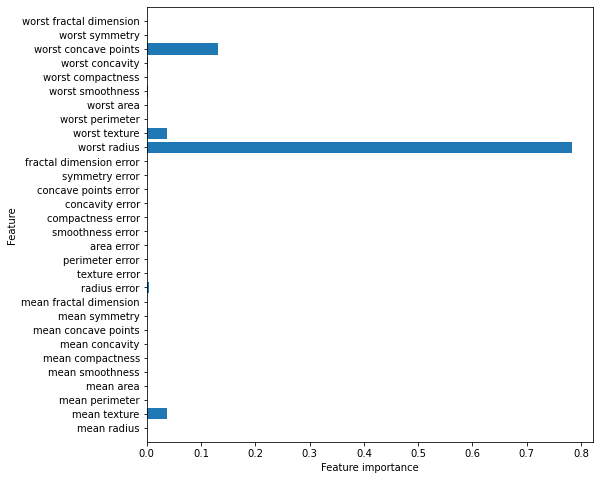

In [22]:
# let's visualize it
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances_cancer(clf)

It does not provide **directional information(클래스가 0인지 1인지 결정하지 않음)** about which class the feature supports.
- higher value of worst radius makes the predictions more positive ? We can't conclude

Feature importances: [0. 1.]


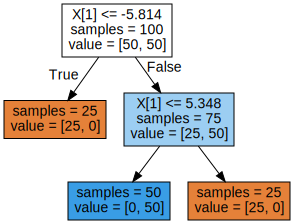

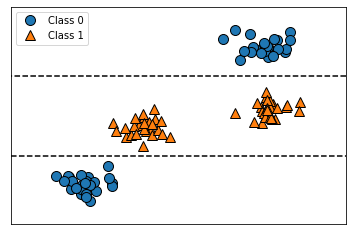

In [23]:
# typical example to show this
# The direction in each split is different. But both only reduce impurity.
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**DecisionTreeRegressor**
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- main argument
    - criterion    

Strengths
- Decision trees work well when you have a mix of continuous and categorical features.
- The algorithms are completely invariant to scaling of the data. (no data scaling is needed)
- Feature selection & reduction is automatic.
- It is robust to noise.
- The resulting model can easily be visualized and understood.

Weaknesses
- They are prone to overfiting.
 - the ensemble methods are usually used in place of a single decision tree.(You will learn it later in class)
- It does not take into account interactions between features.
 - it can only split horizontally on each axis.
- Space of possible decision trees is exponentially large. Greedy approaches are often unable to find the optimal tree.